In [44]:
import pandas as pd
df = pd.read_csv("C:/Users/2/Desktop/MGP/folder/MovieGenre.csv", encoding='ISO-8859-1')
df.head(10)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...
5,113277,http://www.imdb.com/title/tt113277,Heat (1995),8.2,Action|Crime|Drama,https://images-na.ssl-images-amazon.com/images...
6,114319,http://www.imdb.com/title/tt114319,Sabrina (1995),6.3,Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
7,112302,http://www.imdb.com/title/tt112302,Tom and Huck (1995),5.6,Adventure|Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
8,114576,http://www.imdb.com/title/tt114576,Sudden Death (1995),5.7,Action|Crime|Thriller,https://images-na.ssl-images-amazon.com/images...
9,113189,http://www.imdb.com/title/tt113189,GoldenEye (1995),7.2,Action|Adventure|Thriller,https://images-na.ssl-images-amazon.com/images...


In [45]:
# imdbID (ID of film) | Imdb Link (url to the film) | Title (title + year) | IMDB Score (0-10 rating) | Genre (cluster of genre tags) | Poster (link to image)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40106 entries, 0 to 40105
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbId      40106 non-null  int64  
 1   Imdb Link   40106 non-null  object 
 2   Title       40106 non-null  object 
 3   IMDB Score  40058 non-null  float64
 4   Genre       39961 non-null  object 
 5   Poster      39381 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


In [47]:
df = df.sample(n=1000, random_state=1) # i do not want 40K pictures, so i will reduce the dataset randomly

In [48]:
df.isna().sum() # there are 20 movies with no posters whatsoever. I will be dropping those

imdbId         0
Imdb Link      0
Title          0
IMDB Score     0
Genre          3
Poster        20
dtype: int64

In [49]:
df.dropna(inplace=True)

In [50]:
df.isna().sum()

imdbId        0
Imdb Link     0
Title         0
IMDB Score    0
Genre         0
Poster        0
dtype: int64

In [51]:
import requests
import os

def downloadImages(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

os.makedirs('C:/Users/2/Desktop/MGP/folder/SampleMoviePosters', exist_ok=True)

for _, row in df.iterrows():
    imdbId = row['imdbId']
    poster_url = row['Poster']

    filename = f'C:/Users/2/Desktop/MGP/folder/SampleMoviePosters/{imdbId}.jpg'

    downloadImages(poster_url, filename)


In [52]:
df.to_csv('C:/Users/2/Desktop/MGP/folder/sample.csv', index=False)

In [8]:
df = pd.read_csv('C:/Users/2/Desktop/MGP/folder/sample.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbId      977 non-null    int64  
 1   Imdb Link   977 non-null    object 
 2   Title       977 non-null    object 
 3   IMDB Score  977 non-null    float64
 4   Genre       977 non-null    object 
 5   Poster      977 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 45.9+ KB


In [9]:
unique_genres = df['Genre'].str.split('|').explode().unique()
print(unique_genres) 
print(len(unique_genres))

['Comedy' 'Crime' 'Drama' 'Romance' 'Documentary' 'Mystery' 'Sci-Fi'
 'Fantasy' 'Horror' 'History' 'Musical' 'Family' 'Thriller' 'Action'
 'Western' 'Film-Noir' 'Music' 'War' 'Biography' 'Adventure' 'Short'
 'Sport' 'Animation' 'News' 'Adult']
25


In [10]:
df_genres = df['Genre'].str.get_dummies(sep='|')
df = pd.concat([df, df_genres], axis=1)

df.head(10)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,Action,Adult,Adventure,Animation,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,68306,http://www.imdb.com/title/tt68306,Bone (1972),6.9,Comedy,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,91497,http://www.imdb.com/title/tt91497,Mauvais Sang (1986),7.3,Crime|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4341532,http://www.imdb.com/title/tt4341532,Phoenix Incident (2015),5.5,Documentary|Mystery|Sci-Fi,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,143422,http://www.imdb.com/title/tt143422,American Virgin (1999),3.6,Comedy,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13579,http://www.imdb.com/title/tt13579,Schatten - Eine ní_chtliche Halluzination (1923),7.0,Drama|Fantasy|Horror,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1263679,http://www.imdb.com/title/tt1263679,Firaaq (2008),7.4,Drama|History,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,177293,http://www.imdb.com/title/tt177293,To xylo vgike apo ton Paradeiso (1959),7.0,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,1068632,http://www.imdb.com/title/tt1068632,Agathe ClÌ©ry (2008),4.6,Comedy|Musical,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,2188926,http://www.imdb.com/title/tt2188926,Strawberry Summer (2012),5.9,Family,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,76301,http://www.imdb.com/title/tt76301,The Late Show (1977),7.0,Comedy|Mystery|Thriller,https://images-na.ssl-images-amazon.com/images...,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [11]:
genre_counts = df[df.columns[6:]].sum(axis=0).to_list()
print(genre_counts)

[126, 1, 97, 46, 51, 324, 137, 80, 480, 60, 52, 15, 40, 92, 32, 32, 58, 2, 132, 50, 22, 20, 122, 22, 17]


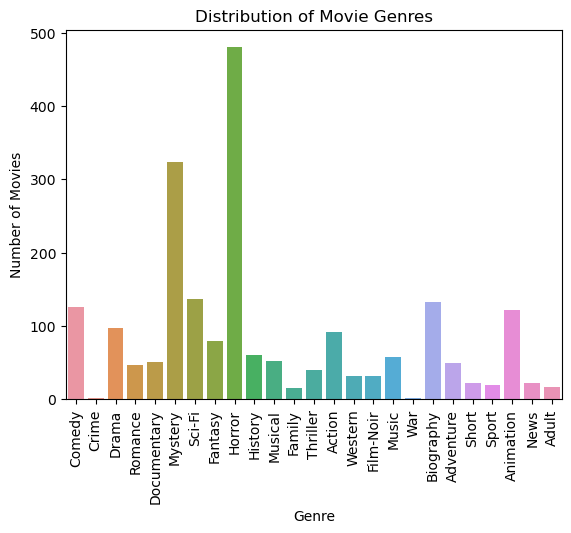

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=unique_genres, y=genre_counts)

plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=90)
plt.show()

In [13]:
# we don't need the entire dataframe, just the genres and the poster IDs
df_needed = df.drop(['Imdb Link', 'Title', 'IMDB Score', 'Genre', 'Poster'], axis=1)
df_needed.head(10)

,imdbId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,68306,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,91497,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,4341532,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,143422,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13579,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1263679,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,177293,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,1068632,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,2188926,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,76301,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [3]:
import os

In [4]:
import cv2

path = 'C:/Users/2/Desktop/MGP/folder/SampleMoviePosters/'
images = os.listdir(path)
image_list = []
id = []
i = 0
for image in images:
    input_path = os.path.join(path, image)
    
    if not os.path.isfile(input_path):
        print(f'File does not exist: {input_path}')
        continue

    img = cv2.imread(input_path)

    if img is None:
        continue
    image_list.append(img)
    id.append(image)
    i+=1

print(i, ' images read successfully.')


848  images read successfully.


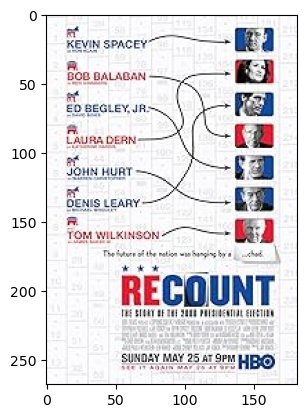

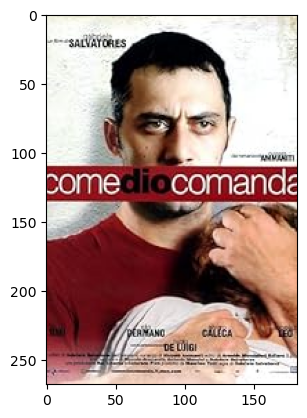

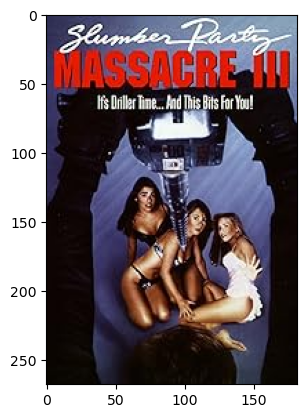

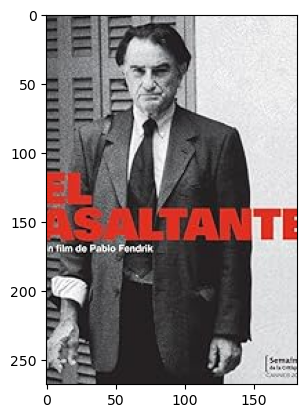

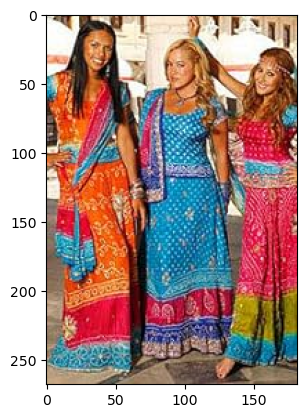

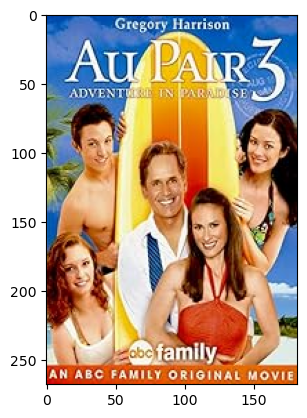

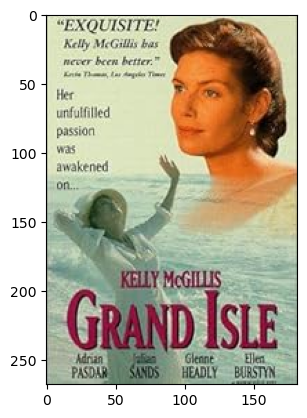

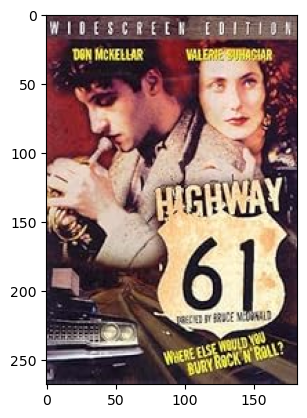

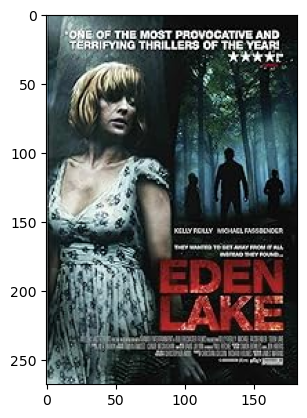

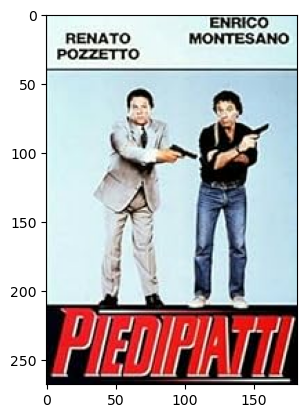

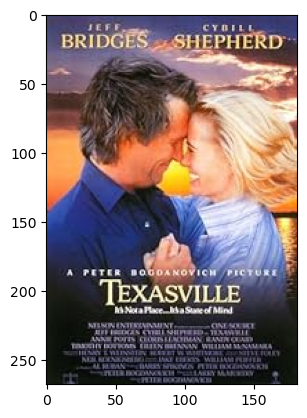

In [5]:
import matplotlib.pyplot as plt

for i, img in enumerate(image_list):
    plt.figure(i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    if i == 10:
        break


In [14]:
df = df.drop(['Imdb Link', 'Title', 'IMDB Score', 'Genre','Poster'], axis=1)
df.head()

,imdbId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,68306,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,91497,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,4341532,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,143422,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13579,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
len(id)
len(image_list)

848

In [16]:
image_names = [int(name.split(".")[0]) for name in id]
print(image_names)


[1000771, 1002536, 100639, 1006823, 1013542, 1019437, 101970, 102035, 1020530, 102668, 103069, 103105, 103241, 103786, 103802, 103854, 103926, 103969, 104109, 104121, 104237, 1043845, 1046936, 105151, 105242, 105316, 105459, 105618, 106307, 106335, 106500, 106852, 1068632, 1075417, 107982, 108071, 1083853, 108473, 1086216, 1087527, 108956, 109287, 109444, 1094668, 109491, 1097256, 109891, 1099196, 110201, 110256, 110383, 111323, 111341, 1114740, 1123373, 112459, 112604, 112767, 113125, 113184, 1132620, 113264, 113580, 1135989, 113755, 113840, 1139643, 114214, 114329, 114478, 114759, 1152828, 1152840, 115487, 115505, 115639, 1157705, 1160004, 1161646, 117412, 117773, 117891, 118001, 118141, 1185416, 118594, 118682, 118698, 118749, 118892, 12, 120086, 120187, 120484, 120498, 120609, 120633, 120788, 120813, 120824, 1216492, 1220706, 122459, 1225703, 122689, 123209, 123334, 1237838, 1239427, 124148, 124718, 124899, 124901, 1249415, 125316, 125879, 1262414, 1263679, 1278340, 1280501, 128388

In [17]:
new_df = df[df['imdbId'].isin(image_names)]
new_df.head()

,imdbId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,68306,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,91497,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,4341532,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,143422,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13579,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
new_df.describe

<bound method NDFrame.describe of       imdbId  Action  Adult  Adventure  Animation  Biography  Comedy  Crime  \
0      68306       0      0          0          0          0       1      0   
1      91497       0      0          0          0          0       0      1   
2    4341532       0      0          0          0          0       0      0   
3     143422       0      0          0          0          0       1      0   
4      13579       0      0          0          0          0       0      0   
..       ...     ...    ...        ...        ...        ...     ...    ...   
971   892425       0      0          0          0          0       0      0   
972  2483260       0      0          1          1          0       0      0   
973    73333       1      0          0          0          0       0      1   
974   241251       0      0          0          0          0       0      0   
975  3462696       1      0          0          0          0       0      0   

     Documentary 

In [19]:
final = new_df.sort_values(by='imdbId')
final.head()

,imdbId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
185,12,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
244,13571,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,13579,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
52,14218,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
48,15119,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
print(id)

['1000771.jpg', '1002536.jpg', '100639.jpg', '1006823.jpg', '1013542.jpg', '1019437.jpg', '101970.jpg', '102035.jpg', '1020530.jpg', '102668.jpg', '103069.jpg', '103105.jpg', '103241.jpg', '103786.jpg', '103802.jpg', '103854.jpg', '103926.jpg', '103969.jpg', '104109.jpg', '104121.jpg', '104237.jpg', '1043845.jpg', '1046936.jpg', '105151.jpg', '105242.jpg', '105316.jpg', '105459.jpg', '105618.jpg', '106307.jpg', '106335.jpg', '106500.jpg', '106852.jpg', '1068632.jpg', '1075417.jpg', '107982.jpg', '108071.jpg', '1083853.jpg', '108473.jpg', '1086216.jpg', '1087527.jpg', '108956.jpg', '109287.jpg', '109444.jpg', '1094668.jpg', '109491.jpg', '1097256.jpg', '109891.jpg', '1099196.jpg', '110201.jpg', '110256.jpg', '110383.jpg', '111323.jpg', '111341.jpg', '1114740.jpg', '1123373.jpg', '112459.jpg', '112604.jpg', '112767.jpg', '113125.jpg', '113184.jpg', '1132620.jpg', '113264.jpg', '113580.jpg', '1135989.jpg', '113755.jpg', '113840.jpg', '1139643.jpg', '114214.jpg', '114329.jpg', '114478.jpg'

In [20]:
print(image_names)

[1000771, 1002536, 100639, 1006823, 1013542, 1019437, 101970, 102035, 1020530, 102668, 103069, 103105, 103241, 103786, 103802, 103854, 103926, 103969, 104109, 104121, 104237, 1043845, 1046936, 105151, 105242, 105316, 105459, 105618, 106307, 106335, 106500, 106852, 1068632, 1075417, 107982, 108071, 1083853, 108473, 1086216, 1087527, 108956, 109287, 109444, 1094668, 109491, 1097256, 109891, 1099196, 110201, 110256, 110383, 111323, 111341, 1114740, 1123373, 112459, 112604, 112767, 113125, 113184, 1132620, 113264, 113580, 1135989, 113755, 113840, 1139643, 114214, 114329, 114478, 114759, 1152828, 1152840, 115487, 115505, 115639, 1157705, 1160004, 1161646, 117412, 117773, 117891, 118001, 118141, 1185416, 118594, 118682, 118698, 118749, 118892, 12, 120086, 120187, 120484, 120498, 120609, 120633, 120788, 120813, 120824, 1216492, 1220706, 122459, 1225703, 122689, 123209, 123334, 1237838, 1239427, 124148, 124718, 124899, 124901, 1249415, 125316, 125879, 1262414, 1263679, 1278340, 1280501, 128388

In [21]:
imgdf = pd.DataFrame(image_names, columns=['imdbId'])
imgdf.head()

,imdbId
0,1000771
1,1002536
2,100639
3,1006823
4,1013542


In [22]:
merged_df = imgdf.merge(final, on='imdbId', how='left')
merged_df.head()

,imdbId,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1000771,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1002536,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100639,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1006823,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1013542,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
X = image_list
Y = merged_df.drop('imdbId', axis=1).values

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

X_train_flat = X_train_np.reshape(X_train_np.shape[0], -1)
X_test_flat = X_test_np.reshape(X_test_np.shape[0], -1)

In [110]:
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_flat, Y_train)
    Y_pred = knn.predict(X_test_flat)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'Test Accuracy: {accuracy * 100:.2f}% at k =', k)

Test Accuracy: 1.76% at k = 1
Test Accuracy: 4.12% at k = 2
Test Accuracy: 4.71% at k = 3
Test Accuracy: 4.12% at k = 4
Test Accuracy: 4.12% at k = 5
Test Accuracy: 5.29% at k = 6
Test Accuracy: 5.88% at k = 7
Test Accuracy: 2.94% at k = 8
Test Accuracy: 6.47% at k = 9
Test Accuracy: 4.71% at k = 10
Test Accuracy: 7.06% at k = 11
Test Accuracy: 5.29% at k = 12
Test Accuracy: 6.47% at k = 13
Test Accuracy: 5.29% at k = 14
Test Accuracy: 5.88% at k = 15
Test Accuracy: 4.12% at k = 16
Test Accuracy: 6.47% at k = 17
Test Accuracy: 5.29% at k = 18
Test Accuracy: 7.06% at k = 19
Test Accuracy: 5.88% at k = 20
Test Accuracy: 6.47% at k = 21
Test Accuracy: 5.88% at k = 22
Test Accuracy: 5.88% at k = 23
Test Accuracy: 5.29% at k = 24
Test Accuracy: 7.06% at k = 25
Test Accuracy: 4.71% at k = 26
Test Accuracy: 5.88% at k = 27
Test Accuracy: 5.29% at k = 28
Test Accuracy: 7.06% at k = 29


In [ ]:
!pip install tensorflow

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [30]:
print("Shape of X_train: ", X_train_np.shape)
print("Shape of Y_train: ", Y_train.shape)

Shape of X_train:  (678, 268, 182, 3)
Shape of Y_train:  (678, 25)


In [35]:
Xtrain = X_train_np / 255.0  # normalize pixel values to [0, 1]

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(268, 182, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(25, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(Xtrain, Y_train, epochs=10, validation_split=0.2)


Epoch 1/10
17/17 [==============================] - 78s 4s/step - loss: 44.8378 - accuracy: 0.2251 - val_loss: 267.1284 - val_accuracy: 0.2353
Epoch 2/10
17/17 [==============================] - 33s 2s/step - loss: 3500.6199 - accuracy: 0.1808 - val_loss: 15812.5791 - val_accuracy: 0.2353
Epoch 3/10
17/17 [==============================] - 42s 3s/step - loss: 60956.0664 - accuracy: 0.2011 - val_loss: 225657.2656 - val_accuracy: 0.1397
Epoch 4/10
17/17 [==============================] - 42s 2s/step - loss: 493576.7188 - accuracy: 0.1365 - val_loss: 1387492.5000 - val_accuracy: 0.1324
Epoch 5/10
17/17 [==============================] - 37s 2s/step - loss: 2381367.5000 - accuracy: 0.1845 - val_loss: 5024816.5000 - val_accuracy: 0.2279
Epoch 6/10
17/17 [==============================] - 39s 2s/step - loss: 7695401.5000 - accuracy: 0.1365 - val_loss: 12878849.0000 - val_accuracy: 0.2132
Epoch 7/10
17/17 [==============================] - 38s 2s/step - loss: 20642208.0000 - accuracy: 0.1550 

In [36]:
Xtrain = X_train_np / 255.0  # normalize pixel values to [0, 1]

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(268, 182, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(25, activation='softmax')
])

# Compile the model
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(Xtrain, Y_train, epochs=10, validation_split=0.2)


Epoch 1/10
17/17 [==============================] - 67s 4s/step - loss: 82.8272 - accuracy: 0.1255 - val_loss: 427.9213 - val_accuracy: 0.0147
Epoch 2/10
17/17 [==============================] - 42s 2s/step - loss: 25278.9883 - accuracy: 0.1661 - val_loss: 136439.3594 - val_accuracy: 0.0515
Epoch 3/10
17/17 [==============================] - 77s 5s/step - loss: 433653.3125 - accuracy: 0.1421 - val_loss: 1276753.8750 - val_accuracy: 0.3015
Epoch 4/10
17/17 [==============================] - 71s 4s/step - loss: 2234541.2500 - accuracy: 0.1900 - val_loss: 4927570.0000 - val_accuracy: 0.2353
Epoch 5/10
17/17 [==============================] - 76s 4s/step - loss: 6262581.0000 - accuracy: 0.1697 - val_loss: 11401012.0000 - val_accuracy: 0.0147
Epoch 6/10
17/17 [==============================] - 54s 3s/step - loss: 12686774.0000 - accuracy: 0.1384 - val_loss: 20596408.0000 - val_accuracy: 0.2206
Epoch 7/10
17/17 [==============================] - 71s 4s/step - loss: 20770714.0000 - accuracy: 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add new layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Prepare iterators
train_it = datagen.flow_from_directory('data/train/', class_mode='categorical', target_size=(150, 150), subset='training')
val_it = datagen.flow_from_directory('data/train/', class_mode='categorical', target_size=(150, 150), subset='validation')

# Fit model
model.fit(train_it, steps_per_epoch=len(train_it), validation_data=val_it, validation_steps=len(val_it), epochs=10)
